In [1]:
# load required libraries
import keras
import numpy as np
import matplotlib.pyplot as plt

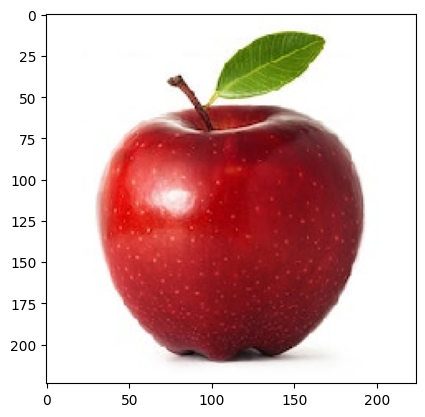

In [2]:
# load sample image file
img_file = "sample-image.jpg"
img = keras.utils.load_img(img_file, target_size=(224,224))
plt.imshow(img)

In [3]:
# load pre-trained model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

base_model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(base_model.layers)

177

In [5]:
# run prediction only upto some intermediate model layer
model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('conv2_block1_1_conv').output)

In [6]:
# convert image to numpy array
img = keras.utils.img_to_array(img)
img.shape

(224, 224, 3)

In [7]:
# pre-process input image
x = preprocess_input(img)

In [8]:
# pass sample image through model
y = model.predict(np.array([x]))
y.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


(1, 56, 56, 64)

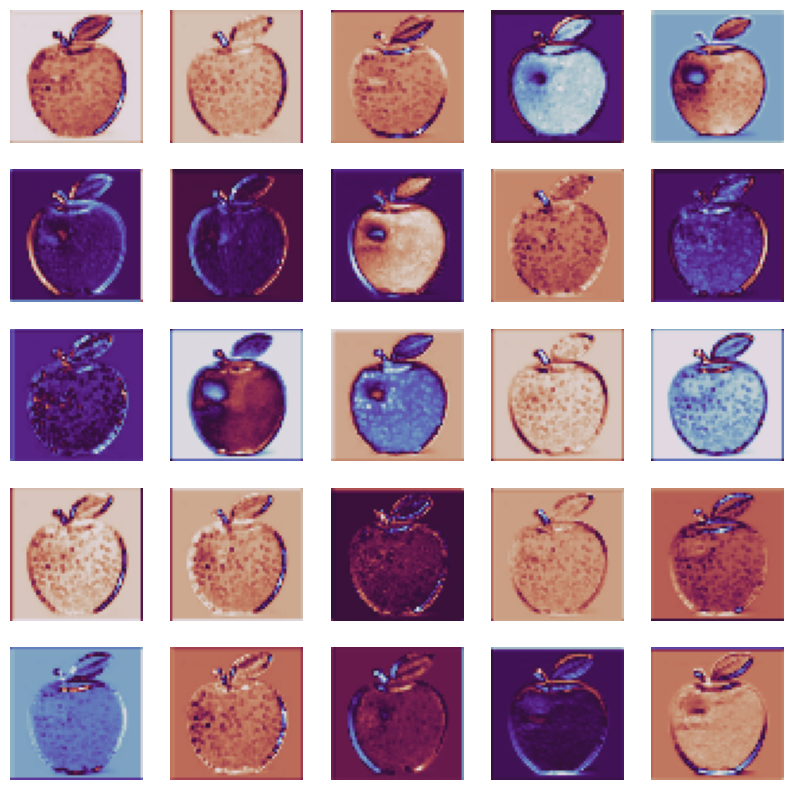

In [9]:
# visualize feature maps

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(y[0,:,:,i], cmap="twilight")

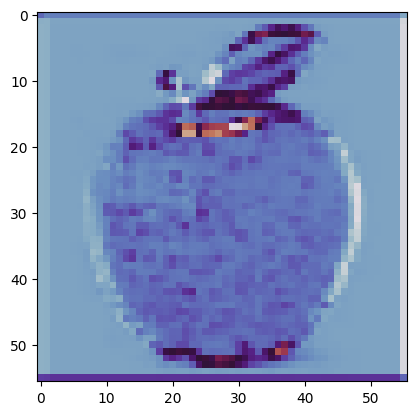

In [10]:
plt.imshow(y[0,:,:,20], cmap='twilight')